In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
#import dateutil

# this code written by Paul AG
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# File to Load (Remember to Change These)

#nyc_zillow_data=pd.read_csv(nyc_zillow_load, low_memory=True)
nyc_crime_by_boro=pd.read_csv('NYC_Crime_Cnt_by_Boro.csv')
#NYC_Crime_Cnt_by_Boro_Df
nyc_re_price_sqft_by_boro=pd.read_csv('NEWYORK_MEDIAN_PRICE_PER_SQFT.csv') 
#NEWYORK_MEDIAN_PRICE_PER_SQFT_DF
nyc_rent_price_by_boro=pd.read_csv('\\Users\\Paul-DS\Downloads\\NYC_AVG_RENTAL_PRICES_BY_BORO.csv') 
#New_York_Rental_Prices_per_boro

boro=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
# Kings is synomous with Brooklyn (same land mass)
county=['New York', 'Bronx', 'Kings', 'Queens', 'Richmond']


In [2]:
nyc_crime_by_boro.head().index

RangeIndex(start=0, stop=5, step=1)

In [3]:
nyc_crime_by_boro.set_index('Date',inplace=True)

In [4]:
nyc_crime_by_boro.head().index

Index(['1996-01', '1996-05', '1996-06', '1996-09', '1996-10'], dtype='object', name='Date')

In [5]:
nyc_re_price_sqft_by_boro.head().index

RangeIndex(start=0, stop=5, step=1)

In [6]:
nyc_re_price_sqft_by_boro.set_index('Date',inplace=True)

In [7]:
nyc_re_price_sqft_by_boro.index

Index(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07'],
      dtype='object', name='Date

In [8]:
nyc_re_price_sqft_by_boro.head()

,Unnamed: 0,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft
Date,,,,,,
2012-01,189,1005.04,450.000000,252.842105,347.406780,256.979167
2012-02,190,1008.44,450.000000,250.842105,346.254237,256.229167
2012-03,191,1011.48,450.209302,249.157895,345.915254,256.479167
2012-04,192,1015.52,450.581395,247.894737,345.542373,257.166667
2012-05,193,1021.12,450.697674,247.368421,345.423729,258.479167


In [9]:
nyc_re_price_sqft_by_boro = nyc_re_price_sqft_by_boro.drop(columns=['Unnamed: 0'])

In [10]:
nyc_re_price_sqft_by_boro.head()

,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft
Date,,,,,
2012-01,1005.04,450.000000,252.842105,347.406780,256.979167
2012-02,1008.44,450.000000,250.842105,346.254237,256.229167
2012-03,1011.48,450.209302,249.157895,345.915254,256.479167
2012-04,1015.52,450.581395,247.894737,345.542373,257.166667
2012-05,1021.12,450.697674,247.368421,345.423729,258.479167


In [11]:
df = nyc_crime_by_boro.join(nyc_re_price_sqft_by_boro)

In [12]:
df.head()

,MANHATTAN_Crime_Cnt,BROOKLYN_Crime_Cnt,QUEENS_Crime_Cnt,BRONX_Crime_Cnt,STATEN_ISLAND_Crime_Cnt,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft
Date,,,,,,,,,,
1996-01,10,14.0,8.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN
1996-05,1,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-06,1,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-09,3,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1996-10,1,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
nyc_rent_price_by_boro.head().index

RangeIndex(start=0, stop=5, step=1)

In [14]:
nyc_rent_price_by_boro.set_index('Date',inplace=True)

In [15]:
nyc_rent_price_by_boro.head()

,Manhattan avg rental price,Brooklyn avg rental price,Bronx avg rental price,Queens avg rental price,Staten Island avg rental price
Date,,,,,
2012-01,3016.884615,1782.708333,1557.190476,1686.245902,1385.500000
2012-02,3021.461538,1776.916667,1548.714286,1693.540984,1384.453488
2012-03,3022.807692,1779.416667,1540.619048,1703.655738,1383.255814
2012-04,3040.461538,1791.625000,1546.238095,1711.672131,1383.360465
2012-05,3052.846154,1811.729167,1557.476190,1719.032787,1384.069767


In [16]:
df2=df.join(nyc_rent_price_by_boro)

In [17]:
df2.head()

,MANHATTAN_Crime_Cnt,BROOKLYN_Crime_Cnt,QUEENS_Crime_Cnt,BRONX_Crime_Cnt,STATEN_ISLAND_Crime_Cnt,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft,Manhattan avg rental price,Brooklyn avg rental price,Bronx avg rental price,Queens avg rental price,Staten Island avg rental price
Date,,,,,,,,,,,,,,,
1996-01,10,14.0,8.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05,1,3.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06,1,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-09,3,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-10,1,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df3=df2.dropna()

In [19]:
df3.count()

MANHATTAN_Crime_Cnt                 72
BROOKLYN_Crime_Cnt                  72
QUEENS_Crime_Cnt                    72
BRONX_Crime_Cnt                     72
STATEN_ISLAND_Crime_Cnt             72
Manhattan Avg Price per sqft        72
Brooklyn Avg Price per sqft         72
Bronx Avg Price per sqft            72
Queens Avg Price per sqft           72
Staten Island Avg Price per sqft    72
Manhattan avg rental price          72
Brooklyn avg rental price           72
Bronx avg rental price              72
Queens avg rental price             72
Staten Island avg rental price      72
dtype: int64

In [20]:
df3.head()

,MANHATTAN_Crime_Cnt,BROOKLYN_Crime_Cnt,QUEENS_Crime_Cnt,BRONX_Crime_Cnt,STATEN_ISLAND_Crime_Cnt,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft,Manhattan avg rental price,Brooklyn avg rental price,Bronx avg rental price,Queens avg rental price,Staten Island avg rental price
Date,,,,,,,,,,,,,,,
2012-01,9784,12629.0,8374.0,9234.0,1844.0,1005.04,450.000000,252.842105,347.406780,256.979167,3016.884615,1782.708333,1557.190476,1686.245902,1385.500000
2012-02,9181,11639.0,7733.0,8656.0,1977.0,1008.44,450.000000,250.842105,346.254237,256.229167,3021.461538,1776.916667,1548.714286,1693.540984,1384.453488
2012-03,10389,13182.0,8258.0,9196.0,2176.0,1011.48,450.209302,249.157895,345.915254,256.479167,3022.807692,1779.416667,1540.619048,1703.655738,1383.255814
2012-04,9964,12626.0,8145.0,8863.0,2007.0,1015.52,450.581395,247.894737,345.542373,257.166667,3040.461538,1791.625000,1546.238095,1711.672131,1383.360465
2012-05,10633,13856.0,8778.0,9505.0,2093.0,1021.12,450.697674,247.368421,345.423729,258.479167,3052.846154,1811.729167,1557.476190,1719.032787,1384.069767


In [21]:
df3.to_csv("NYC_CRIME_PRICE_SQFT_RENTAL_BY_BORO.csv")

In [22]:
df3=df3.reset_index()

In [23]:
yr_df=df3['Date'].str.split('-', expand=True)

In [24]:
df3=df3.join(yr_df)

In [25]:
main_df=df3.rename(columns={0:'YR',1:'M'})

In [26]:
nyc_crime_yr_df=pd.DataFrame(main_df, columns=['Date','YR','MANHATTAN_Crime_Cnt','BROOKLYN_Crime_Cnt','QUEENS_Crime_Cnt',
                                             'BRONX_Crime_Cnt',
                                             'STATEN_ISLAND_Crime_Cnt'])

In [27]:
nyc_crime_yr_df=nyc_crime_yr_df.drop(columns=['Date']).groupby(['YR']).sum()

In [44]:
nyc_crime_yr_df=nyc_crime_yr_df.rename(columns={'MANHATTAN_Crime_Cnt':'MANHATTAN Crime Cnt','BROOKLYN_Crime_Cnt':'BROOKLYN Crime Cnt',
                        'QUEENS_Crime_Cnt':'QUEENS Crime Cnt','BRONX_Crime_Cnt':'BRONX Crime Cnt',
                        'STATEN_ISLAND_Crime_Cnt':'STATEN ISLAND Crime Cnt'})

In [45]:
nyc_crime_yr_df

,MANHATTAN Crime Cnt,BROOKLYN Crime Cnt,QUEENS Crime Cnt,BRONX Crime Cnt,STATEN ISLAND Crime Cnt
YR,,,,,
2012,119956,154802.0,99172.0,106958.0,23621.0
2013,117883,149725.0,101051.0,104166.0,22628.0
2014,113398,148804.0,100356.0,106276.0,22767.0
2015,112890,142855.0,94906.0,105032.0,22170.0
2016,115174,140162.0,94068.0,105527.0,21736.0
2017,111646,134713.0,89515.0,101305.0,20856.0


In [46]:
nyc_crime_yr_df.reset_index().to_csv("nyc_crime_yr_df.csv")

In [30]:
nyc_avg_price_sqft_yr_df=pd.DataFrame(main_df,columns=['YR','Manhattan Avg Price per sqft','Brooklyn Avg Price per sqft',
                                                       'Bronx Avg Price per sqft'
                                                       ,'Queens Avg Price per sqft','Staten Island Avg Price per sqft'])

In [31]:
nyc_avg_price_sqft_yr_df=nyc_avg_price_sqft_yr_df.groupby(['YR']).mean()

In [32]:
nyc_avg_price_sqft_yr_df

,Manhattan Avg Price per sqft,Brooklyn Avg Price per sqft,Bronx Avg Price per sqft,Queens Avg Price per sqft,Staten Island Avg Price per sqft
YR,,,,,
2012,1033.476667,454.848837,247.000000,347.867232,257.953125
2013,1133.230000,493.604651,257.771930,362.925141,259.149306
2014,1283.083333,552.040698,258.285088,391.813559,270.024306
2015,1375.263333,616.941860,268.460526,422.248588,284.699653
2016,1432.233333,671.180233,284.035088,455.947740,303.005208
2017,1430.273333,708.587209,312.254386,490.720339,336.152778


In [33]:
nyc_avg_price_sqft_yr_df.reset_index().to_csv("nyc_avg_price_sqft_yr_df.csv")

In [34]:
nyc_avg_rent_yr_df=pd.DataFrame(main_df,columns=['YR','Manhattan avg rental price','Brooklyn avg rental price',
                                                 'Bronx avg rental price','Queens avg rental price',
                                                 'Staten Island avg rental price'])

In [35]:
nyc_avg_rent_yr_df=nyc_avg_rent_yr_df.groupby(['YR']).mean()

In [36]:
nyc_avg_rent_yr_df

,Manhattan avg rental price,Brooklyn avg rental price,Bronx avg rental price,Queens avg rental price,Staten Island avg rental price
YR,,,,,
2012,3075.647436,1858.980903,1584.166667,1726.265027,1387.799419
2013,3186.294872,2042.012153,1633.579365,1833.729508,1481.414729
2014,3421.733974,2194.678819,1677.857143,2028.334699,1517.761628
2015,3786.842949,2333.333333,1788.734127,2168.554645,1585.943798
2016,3778.961538,2427.928819,1846.658730,2257.661202,1582.347868
2017,3670.596154,2458.456597,1843.607143,2275.856557,1601.062984


In [37]:
nyc_avg_rent_yr_df.reset_index().to_csv("nyc_avg_rent_yr_df.csv")

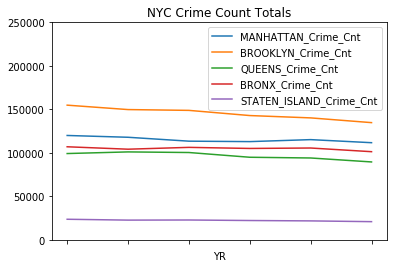

In [39]:
nyc_crime_yr_df.plot.line()
plt.ylim(0,250000)
plt.title("NYC Crime Count Totals")
plt.savefig("NYC_Crime_Count_Totals_lines.png")

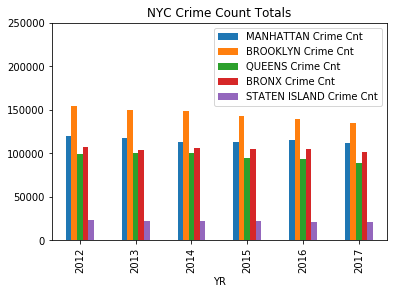

In [47]:
nyc_crime_yr_df.plot.bar()
plt.ylim(0,250000)
plt.title("NYC Crime Count Totals")
plt.savefig("NYC_Crime_Count_Totals.png")

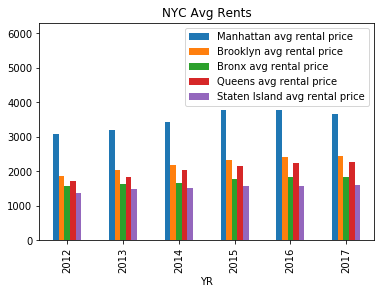

In [40]:
nyc_avg_rent_yr_df.plot.bar()
plt.ylim(0,6300)
plt.title("NYC Avg Rents")
plt.savefig("NYC_Avg_Rents.png")

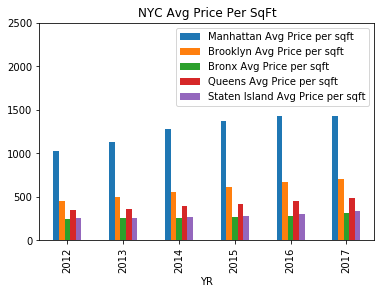

In [41]:
nyc_avg_price_sqft_yr_df.plot.bar()
plt.ylim(0,2500)
plt.title("NYC Avg Price Per SqFt")
plt.savefig("NYC_Avg_Price_Per_SqFt.png")